In [118]:
from IPython.display import SVG
import math
import random
import numpy as np

Juptyper notebooks and sphinx are both capable of displaying SVG to the user. We will use this feature to display the board to the reader.
Here is an example of a basic SVG file:

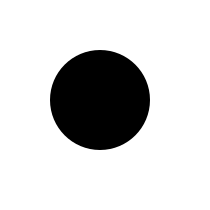

In [169]:
SVG("""
<svg width="210" height="210">
  <style>
    circle {
      fill: none;
      stroke: #000;
      stroke-width: 2;
    }
    .bean {
      fill: #000
    }
  </style>
  <circle cx="100" cy="100" r="50"/>
  <circle cx="100" cy="100" r="4" class="bean"/></svg>
""")

We can now write a function that takes a board matrix as input and returns a string containing an SVG file

In [197]:
radius = 40
pit_size = radius*2.2
bean_radius = 4
bean_size = bean_radius * 2.2
grid_bean_size = bean_radius * 3

def board_to_svg(pits, show_count=False, highlight=None):
    board = ""
    beans = ""
    if highlight is None:
        highlight = set()

    for player in range(pits.shape[0]):
        for pit in range(pits.shape[1]):
            cx = radius*1.2+pit*pit_size
            cy = radius*1.2+player*pit_size
            board += '<circle cx="{x}" cy="{y}" r="{r}" {klass}/>'.format(
                x=cx,
                y=cy,
                r=radius,
                klass='class="highlight"' if (player, pit) in highlight else ''
            )
            n_beans = pits[player][pit]
            if show_count:
                board += '<text x="{x}" y="{y}" >{n}</text>'.format(
                    x=cx + radius * 0.85,
                    y=cy + radius * 0.85,
                    n=n_beans
                )
            if n_beans == 0:
                pass
            elif n_beans <= 6:
                distance = math.sqrt(bean_radius * (n_beans - 1)) * 3
                start_angle = random.random() * math.pi
                for i in range(n_beans):
                    angle = i * 2 * math.pi / n_beans
                    bx = cx + math.sin(start_angle + angle) * distance
                    by = cy + math.cos(start_angle + angle) * distance
                    beans += '<circle cx="{x}" cy="{y}" r="{r}" class="bean"/>'.format(x=bx, y=by, r=bean_radius)
            else:
                grid_width = math.ceil(math.sqrt(n_beans))
                offset = grid_bean_size * grid_width / 3
                for i in range(n_beans):
                    bx = cx - offset + (i % grid_width) * grid_bean_size
                    by = cy - offset + (i // grid_width) * grid_bean_size
                    beans += '<circle cx="{x}" cy="{y}" r="{r}" class="bean"/>'.format(x=bx, y=by, r=bean_radius)


    return """
    <svg width="700" height="240">
      <style>
        circle {
          fill: none;
          stroke: #000;
          stroke-width: 2;
        }
        .bean {
          fill: #000
        }
        .highlight {
          stroke: red;
        }
      </style>

      %s
      %s
    </svg>
    """ % (board, beans)

Here is an example with a board generated at random

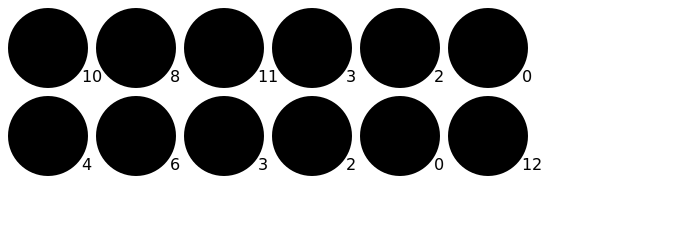

In [198]:
random_board = np.random.randint(0, 15, (2, 6))
SVG(board_to_svg(random_board, show_count=True, highlight=[(0, 5)]))